In [1]:
import systems.harddisk as hd
import numpy as np

2025-07-14 10:19:01,561 - INFO - system created with 4 particles
2025-07-14 10:19:01,562 - INFO - calculating next events


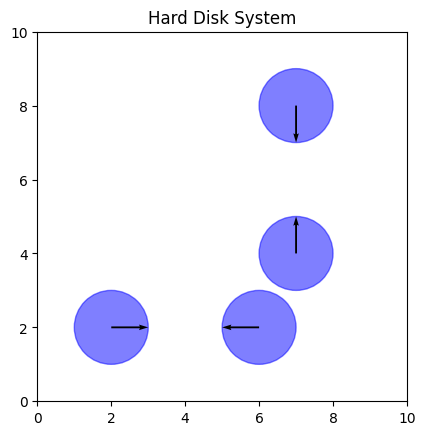

In [5]:
box_size = 10
n_particles = 4
particle_radius = 1
system_a = hd.HardDisckWalls(
    box_size = box_size, 
    n_particles=n_particles,
    particle_radius=particle_radius, 
)

system_a.positions = np.array([[2.,2.], [6.,2.], [7.,4.],[7,8]])
system_a.velocities = np.array([[1.,0.], [-1.,0.], [0.,1.],[0,-1]])
pair_colision_times = system_a._next_pair_collision()
system_a.plot_system()

array([[-4.,  0.],
       [-5., -2.],
       [-5., -6.],
       [-1., -2.],
       [-1., -6.],
       [ 0., -4.]])

In [ ]:
rel_disp

array([[-4.,  0.],
       [-5., -2.],
       [-5., -6.],
       [-1., -2.],
       [-1., -6.],
       [ 0., -4.]])

In [30]:
print(np.triu_indices(n,k=1))
np.einsum("ij,ij->i", rel_disp,rel_disp)

(array([0, 0, 0, 1, 1, 2]), array([1, 2, 3, 2, 3, 3]))


array([16., 29., 61.,  5., 37., 16.])

In [ ]:
def new_distances(sys):
    n = sys.positions.shape[0]

    # get the flat index lists for i<j
    i_idx, j_idx = np.triu_indices(n, k=1)

    # now build only those relative vectors:
    rel_disp = sys.positions[i_idx] - sys.positions[j_idx]  # shape = (N*(N-1)/2, D)
    return rel_disp

def new_velocities(sys:hd.HardDisckWalls):
    n = sys.positions.shape[0]
    i_idx, j_idx = np.triu_indices(n, k=1)
    rel_vel=sys.velocities[i_idx] - sys.velocities[j_idx]
    return rel_vel

def single_particle_colisions(sys, i):
    
def new_pair_colisions(sys):
    dx = new_distances(sys)
    dv = new_velocities(sys)

    dx_dx = np.einsum("ij,ij->i", dx,dx)
    dx_dv = np.einsum("ij,ij->i", dx,dv)
    dv_dv = np.einsum("ij,ij->i", dv,dv)

    delta = np.square(dx_dv) - dv_dv * (dx_dx - 4*sys.particle_radius**2)
    mask = (delta>-1e-12) & (dx_dv<0)

    time_to_colide = np.full_like(delta, np.inf, dtype=float)
    time_to_colide[mask] = - (dx_dv[mask] + np.sqrt(delta[mask])) / dv_dv[mask]

    return time_to_colide

print(np.triu_indices(4,k=1))
print(new_pair_colisions(system_a))



(array([0, 0, 0, 1, 1, 2]), array([1, 2, 3, 2, 3, 3]))
[1.                inf 4.17712434        inf        inf 1.        ]


In [ ]:
up_triangle = np.triu_indices(4,k=1)
particle=0
i_idx = np.ones(4,dtype=int) * particle
np.where(np.triu_indices(4,k=1)[0]==0)

(array([0, 1, 2]),)